## Import Essential Libraries & Load in Data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv('E:\josh_data_science\Vassar Datafest 2018\Dataset_and_FeatureDictionary\indeed_cleaned.csv', encoding='cp1252')

In [5]:
# Remove unnecessary column
del df['Unnamed: 0']

## Seasonality in # of Clicks Comparison amongst different country job postings

In [6]:
total_clicks_ts = pd.DataFrame(df.groupby(['country','date']).clicks.sum()).reset_index()

In [7]:
total_clicks_ts_by_country = total_clicks_ts.pivot(index='date',columns='country', values='clicks')

In [8]:
total_clicks_ts_by_country.reset_index(inplace=True)

In [9]:
# Changing 'date' to datetime 
total_clicks_ts_by_country.date = pd.to_datetime(total_clicks_ts_by_country.date)

##### Raw Time Series

Text(0,0.5,'Total # of Clicks')

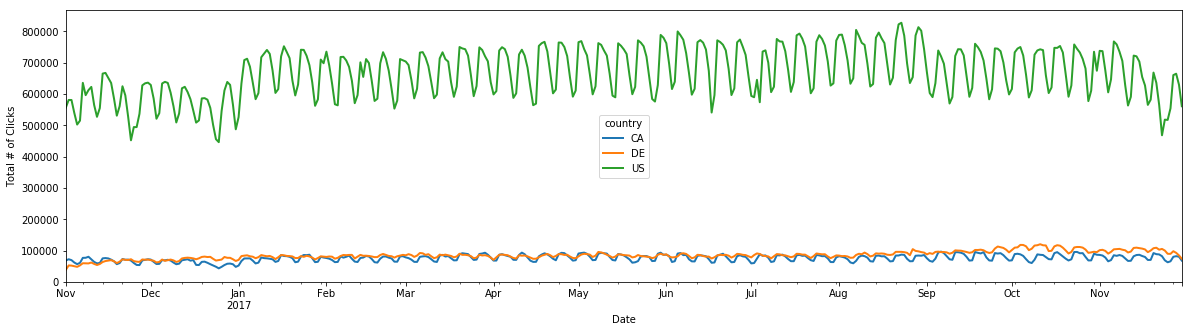

In [10]:
# Total clicks by country
total_clicks_ts_by_country.set_index('date').plot(figsize=(20,5), linewidth=2, fontsize=10)
plt.xlabel('Date',fontsize=10)
plt.ylabel('Total # of Clicks',fontsize=10)

###### Time Series with Rolling Average (Trend)

Text(0,0.5,'Total # of Clicks (Rolling Average)')

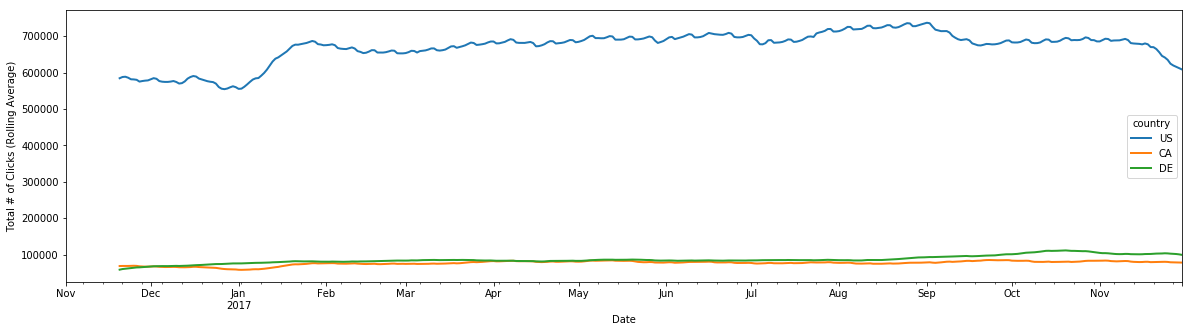

In [11]:
# Identifying trends: Rolling Average
pd.concat([total_clicks_ts_by_country.set_index('date')[['US']].rolling(20).mean(), 
           total_clicks_ts_by_country.set_index('date')[['CA']].rolling(20).mean(),
                  total_clicks_ts_by_country.set_index('date')[['DE']].rolling(20).mean()], axis=1).\
plot(figsize=(20,5), linewidth=2, fontsize=10)

plt.xlabel('Date', fontsize=10)
plt.ylabel('Total # of Clicks (Rolling Average)',fontsize=10)

If we look at the trend of the total number of clicks, Canada and Germany don't seem to have any clear trends over that time period (2016-11 to 2017-11). The graph for the U.S is pretty stable too but **there is some major spike between January and February of 2017**

###### Removing Trend from graph to look at seasonality (Stationary)

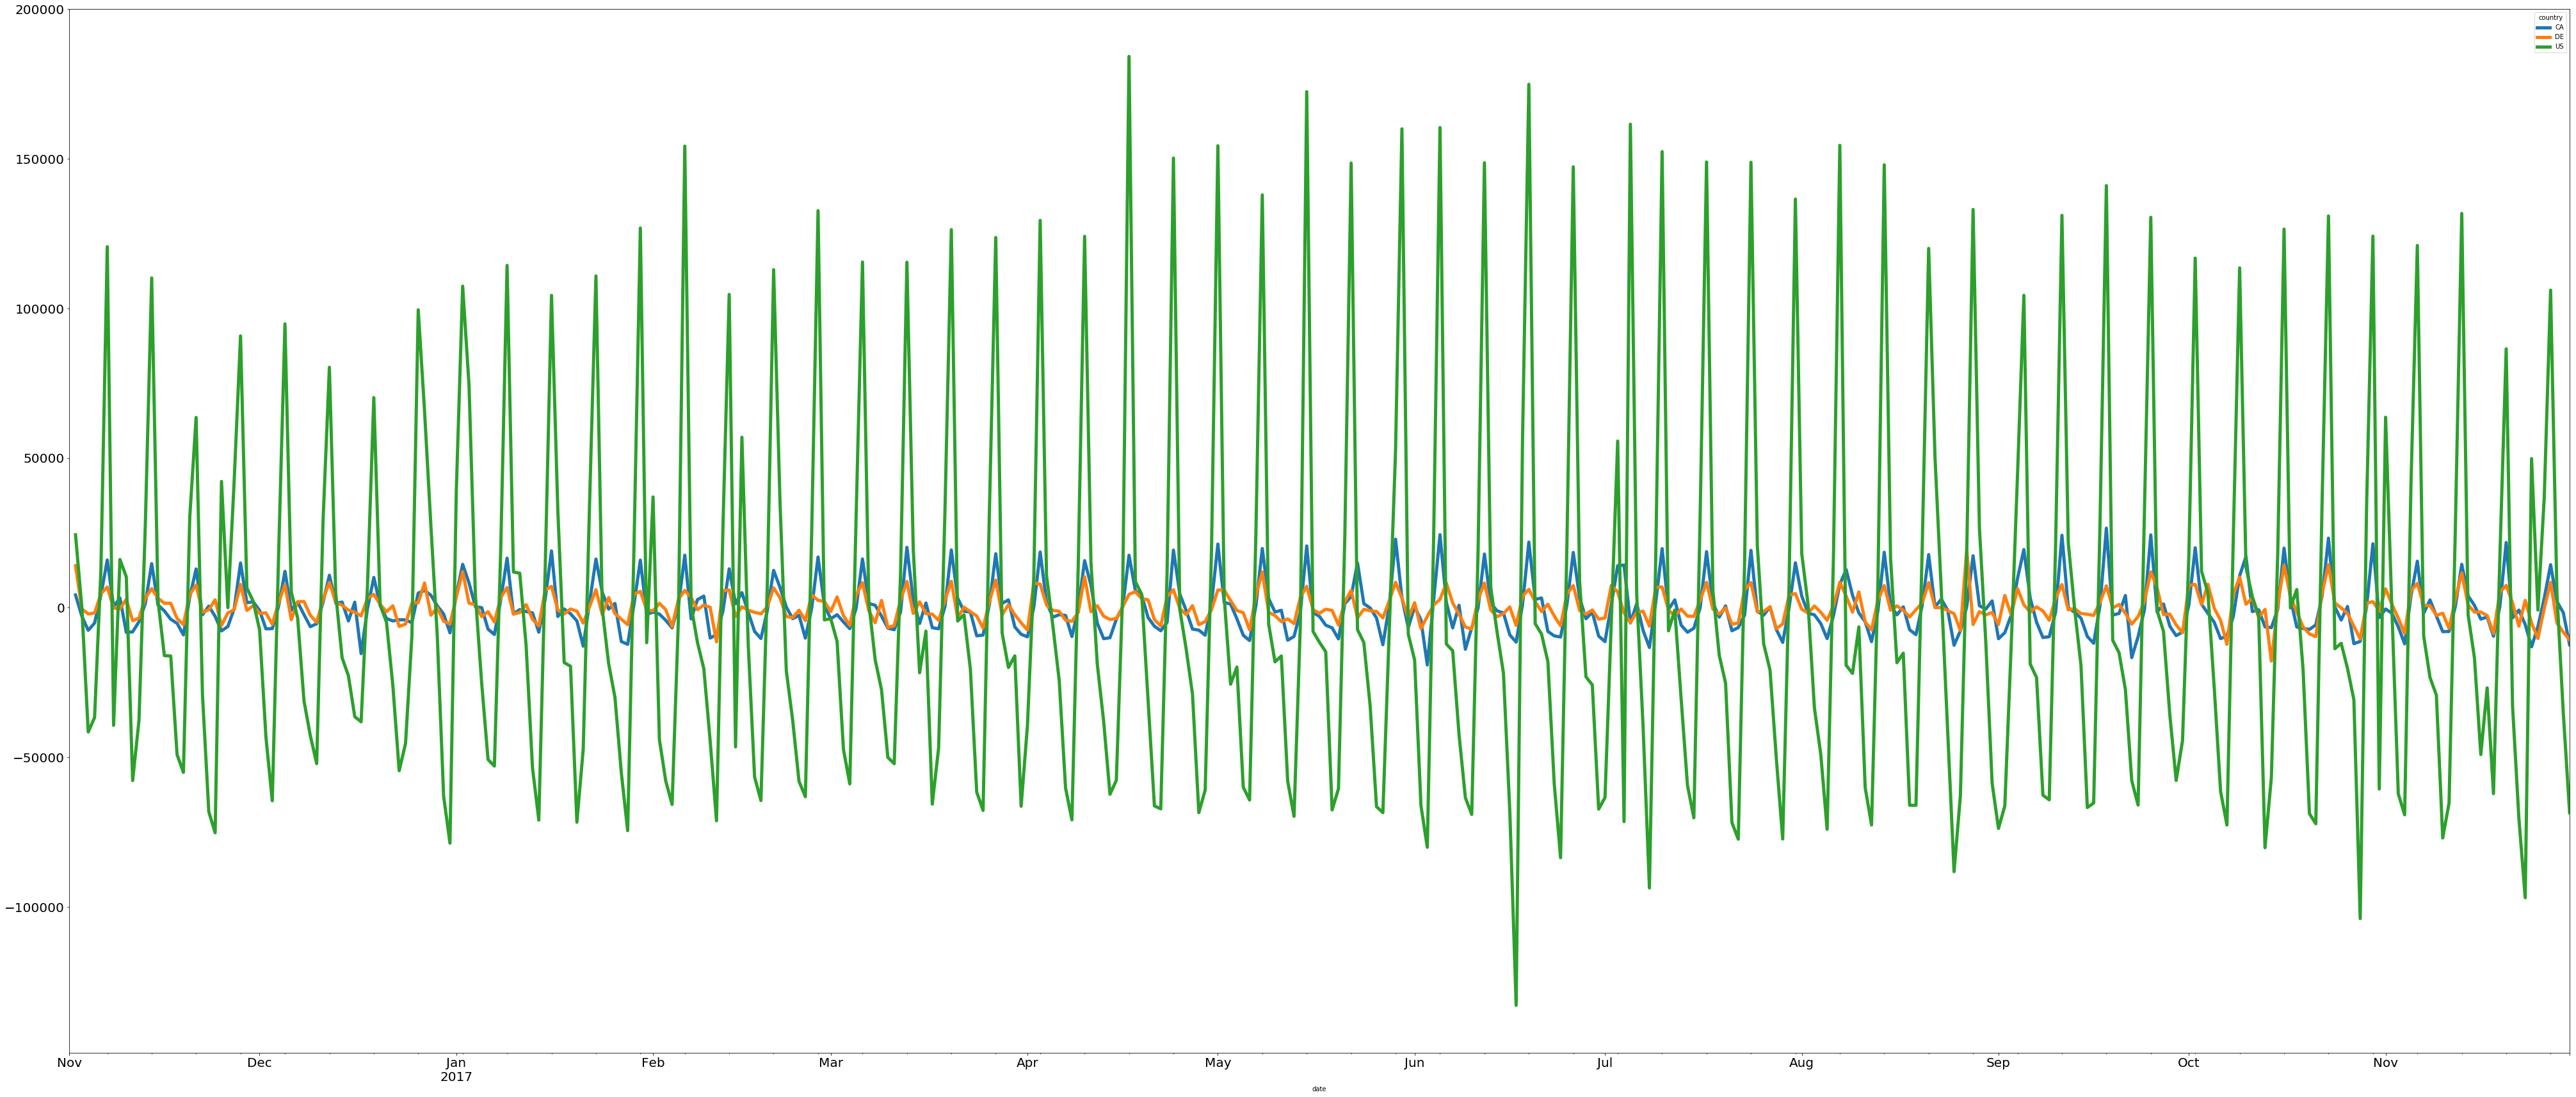

In [19]:
# Seasonality : Differencing (first order)
total_clicks_ts_by_country.set_index('date').diff().plot(figsize=(70,30), linewidth=5, fontsize=20)

All three graphs where the trend was removed look very correlated. 

In [21]:
# Correlation of raw data
total_clicks_ts_by_country.corr()

country,CA,DE,US
country,,,
CA,1.000000,0.581382,0.825077
DE,0.581382,1.000000,0.508382
US,0.825077,0.508382,1.000000


In [22]:
# Correlation of differenced data
total_clicks_ts_by_country.set_index('date').diff().corr()

country,CA,DE,US
country,,,
CA,1.000000,0.715205,0.860389
DE,0.715205,1.000000,0.726906
US,0.860389,0.726906,1.000000


The click number of countries are positively correlated with one another pretty strongly but the stationary time series with differencing display even stronger correlation. **The seasonality of click numbers of these three countries are strongly correlated in a positive linear fashion. That is, the periodic spikes and downs are well synchronized.**

Text(0.5,1,'Auto Correlation Plot for U.S. Total Clicks')

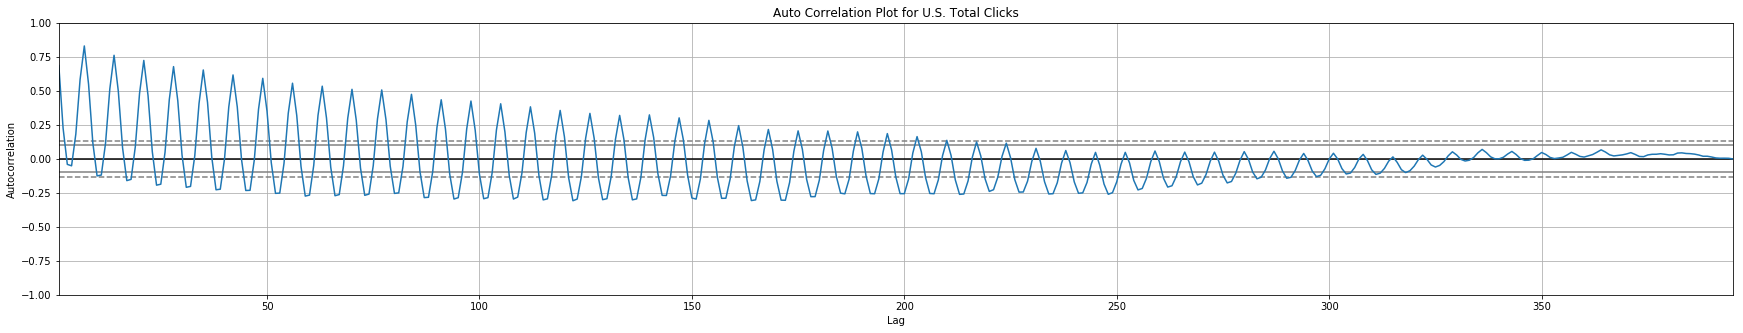

In [35]:
plt.figure(figsize=(30,5))
pd.plotting.autocorrelation_plot(total_clicks_ts_by_country[['date','US']].set_index('date'))
plt.title('Auto Correlation Plot for U.S. Total Clicks')

Text(0.5,1,'Auto Correlation Plot for Canada Total Clicks')

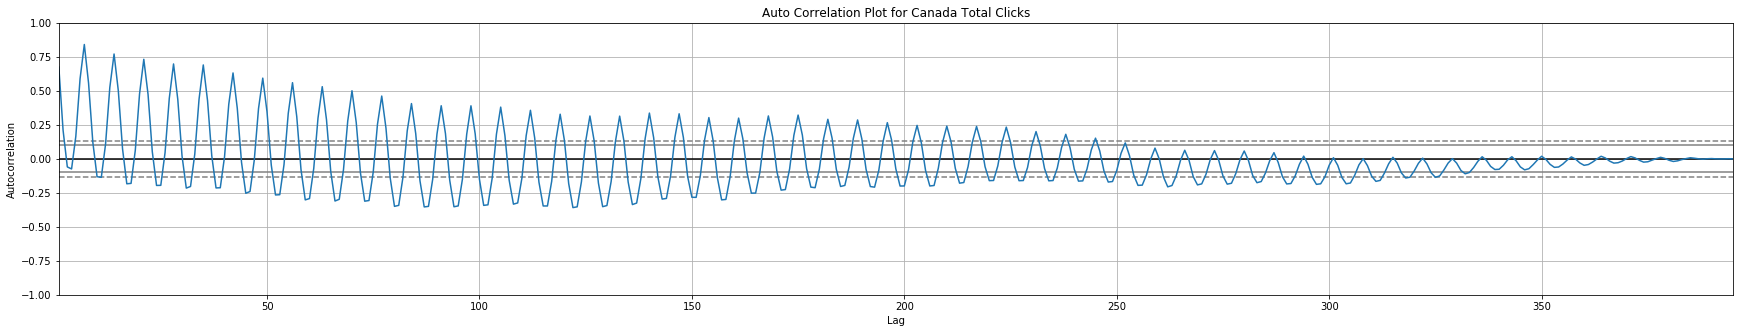

In [40]:
plt.figure(figsize=(30,5))
pd.plotting.autocorrelation_plot(total_clicks_ts_by_country[['date','CA']].set_index('date'))
plt.title('Auto Correlation Plot for Canada Total Clicks')

Text(0.5,1,'Auto Correlation Plot for Germany Total Clicks')

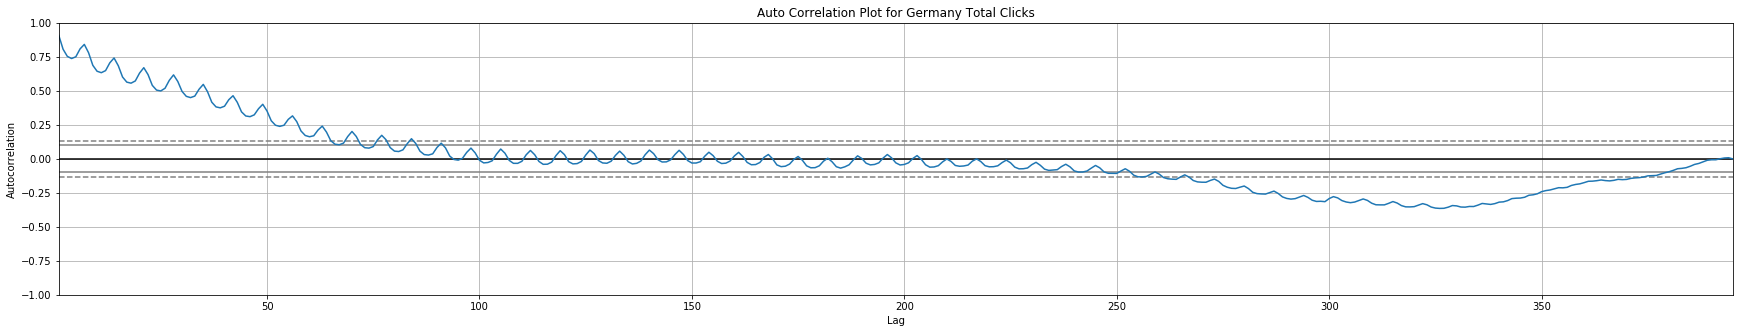

In [41]:
plt.figure(figsize=(30,5))
pd.plotting.autocorrelation_plot(total_clicks_ts_by_country[['date','DE']].set_index('date'))
plt.title('Auto Correlation Plot for Germany Total Clicks')

For U.S. and Canada, there are statistically significant positive autocorrelation up until 150~200 lags(days), and this means when the number of total clicks rise, it tends to continue rising for 150~200 days. Thus, it is advisable for **U.S. and Canadian companies to re-upload or renew job postings every 150~200 days to maximize click numbers (job posting visibility). For Germany, the statistically significant positive autocorrelation can be found up util 50 lags(days), so it is advisable to renew job postings more frequently (like every 50 days)than U.S. or Canadian counterparts.**

## Seasonality by Industry of U.S. Job Postings

I will examine the seasonality of the four major industries that are popular amongst recent graduates
- INTERNET_AND_SOFTWARE
- CONSULTING_AND_BUSINESS_SERVICES
- BANKS_AND_FINANCIAL_SERVICES
- HEALTH_CARE

In [45]:
top4_industries = ['INTERNET_AND_SOFTWARE', 'CONSULTING_AND_BUSINESS_SERVICES', 'BANKS_AND_FINANCIAL_SERVICES', 'HEALTH_CARE']

In [48]:
total_clicks_ts_by_top4industry = pd.DataFrame(df.groupby(['industry','date']).clicks.sum()).reset_index().copy()\
[pd.DataFrame(df.groupby(['industry','date']).clicks.sum()).reset_index().copy().industry.isin(top4_industries)].\
pivot(index='date',columns='industry', values='clicks')

In [56]:
total_clicks_ts_by_top4industry.reset_index(inplace=True)

In [57]:
# Changing 'date' to datetime 
total_clicks_ts_by_top4industry.date = pd.to_datetime(total_clicks_ts_by_country.date)

##### Raw Time Series

Text(0,0.5,'Total # of Clicks')

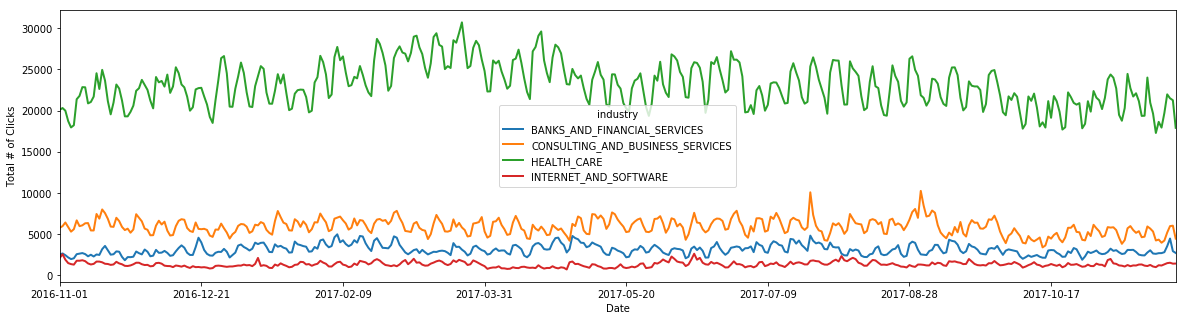

In [58]:
# Total clicks by country
total_clicks_ts_by_top4industry.set_index('date').plot(figsize=(20,5), linewidth=2, fontsize=10)
plt.xlabel('Date',fontsize=10)
plt.ylabel('Total # of Clicks',fontsize=10)

###### Time Series with Rolling Average (Trend)

Text(0,0.5,'Total # of Clicks (Rolling Average)')

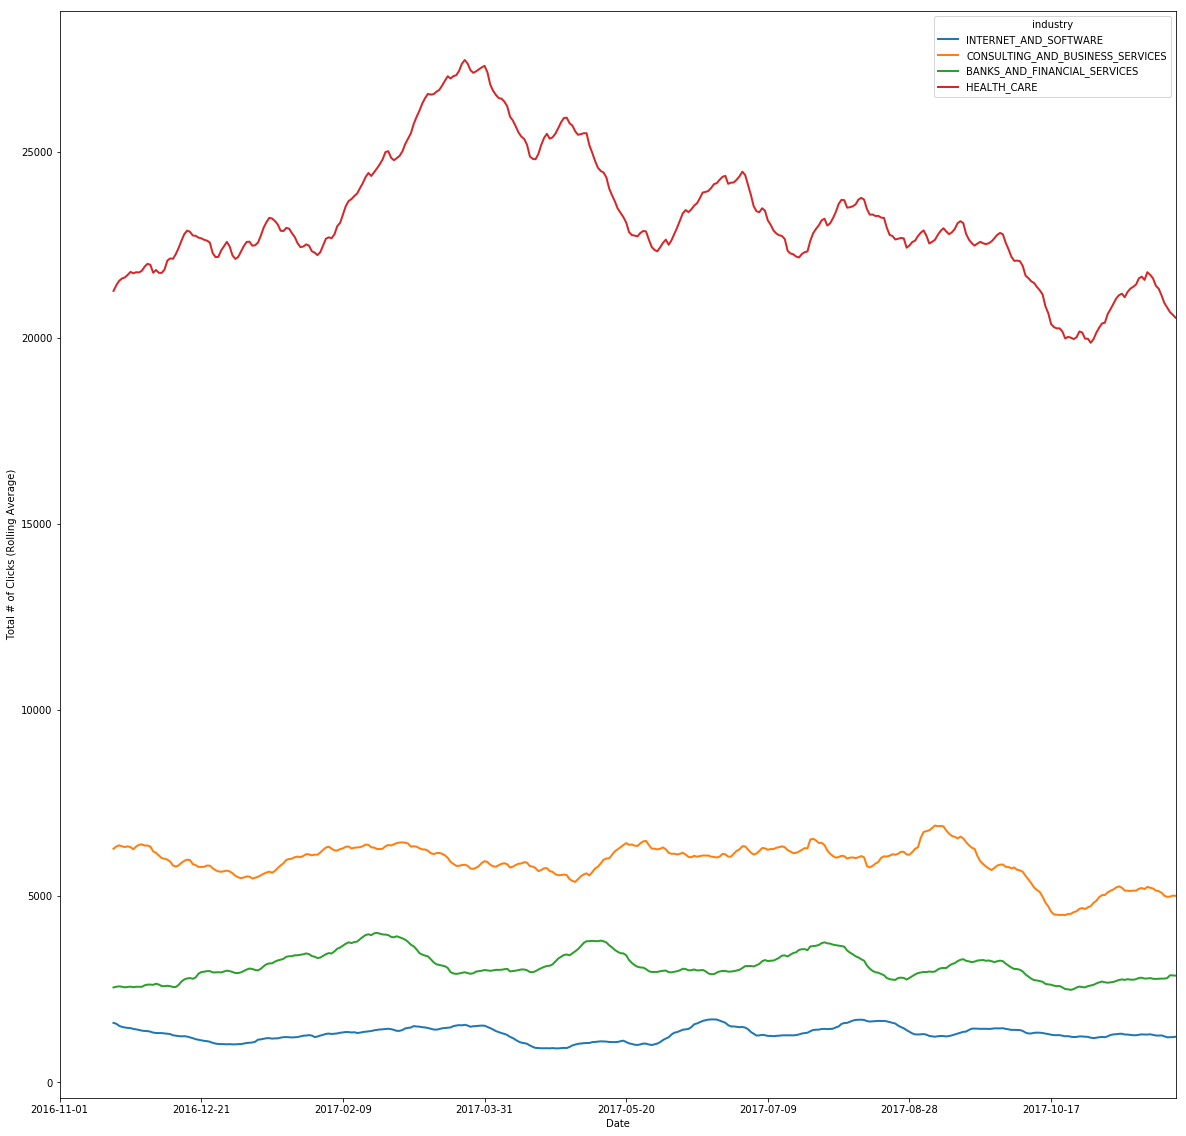

In [64]:
# Identifying trends: Rolling Average
pd.concat([total_clicks_ts_by_top4industry.set_index('date')[['INTERNET_AND_SOFTWARE']].rolling(20).mean(), 
           total_clicks_ts_by_top4industry.set_index('date')[['CONSULTING_AND_BUSINESS_SERVICES']].rolling(20).mean(),
                  total_clicks_ts_by_top4industry.set_index('date')[['BANKS_AND_FINANCIAL_SERVICES']].rolling(20).mean(),
          total_clicks_ts_by_top4industry.set_index('date')[['HEALTH_CARE']].rolling(20).mean()], axis=1).\
plot(figsize=(20,20), linewidth=2, fontsize=10)

plt.xlabel('Date', fontsize=10)
plt.ylabel('Total # of Clicks (Rolling Average)',fontsize=10)

If we look at the trend of the total number of clicks, all four industries seem to be having increased volume of clicks from late January to March, with the healthcare sector having the highest increment. The healthcare sector and the consulting industry also share the similarity of having the lowest total click numbers during Fall(October). The finance sector seems to display some seasonality with spikes at about every 90~110 days.

###### Removing Trend from graph to look at seasonality (Stationary)

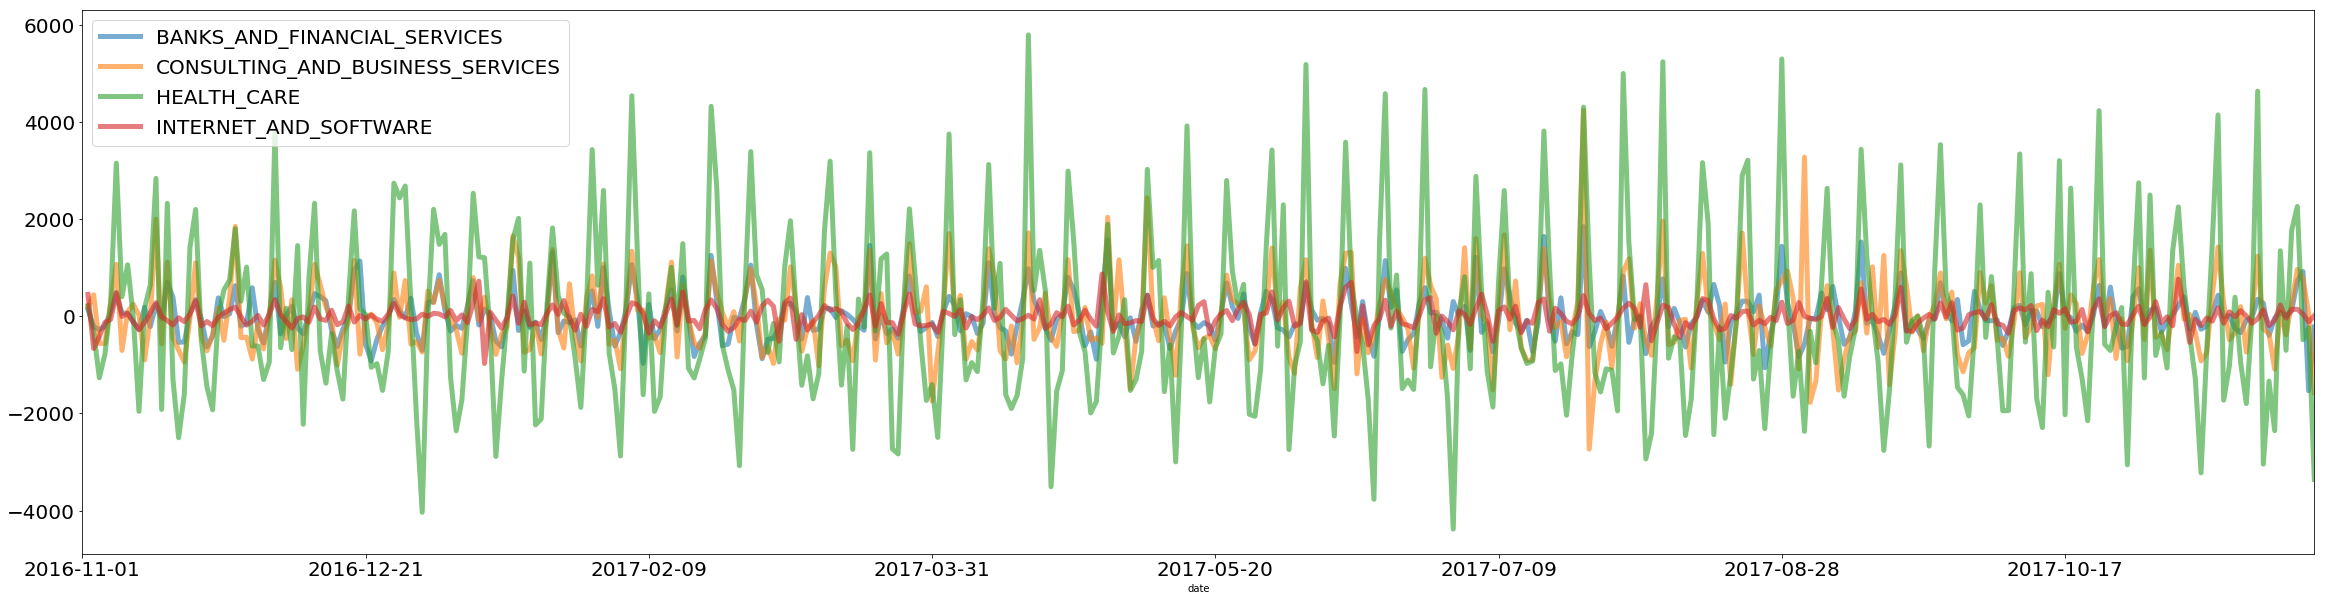

In [83]:
# Seasonality : Differencing (first order)
total_clicks_ts_by_top4industry.set_index('date').diff().plot(figsize=(40,10), linewidth=5, fontsize=20, alpha=0.6)
plt.legend(loc=2, prop={'size': 20})

All three graphs with trends removed look very correlated. 

In [84]:
# Correlation of raw data
total_clicks_ts_by_top4industry.corr()

industry,BANKS_AND_FINANCIAL_SERVICES,CONSULTING_AND_BUSINESS_SERVICES,HEALTH_CARE,INTERNET_AND_SOFTWARE
industry,,,,
BANKS_AND_FINANCIAL_SERVICES,1.000000,0.501031,0.570460,0.200453
CONSULTING_AND_BUSINESS_SERVICES,0.501031,1.000000,0.539615,0.324877
HEALTH_CARE,0.570460,0.539615,1.000000,0.321825
INTERNET_AND_SOFTWARE,0.200453,0.324877,0.321825,1.000000


In [85]:
# Correlation of differenced data
total_clicks_ts_by_top4industry.set_index('date').diff().corr()

industry,BANKS_AND_FINANCIAL_SERVICES,CONSULTING_AND_BUSINESS_SERVICES,HEALTH_CARE,INTERNET_AND_SOFTWARE
industry,,,,
BANKS_AND_FINANCIAL_SERVICES,1.000000,0.587122,0.677210,0.426901
CONSULTING_AND_BUSINESS_SERVICES,0.587122,1.000000,0.669550,0.427875
HEALTH_CARE,0.677210,0.669550,1.000000,0.488902
INTERNET_AND_SOFTWARE,0.426901,0.427875,0.488902,1.000000


The click number of top4 industries are positively correlated with one another pretty strongly but the stationary time series with differencing display even stronger correlation. **The seasonality of click numbers of these three countries are strongly correlated in a positive linear fashion. That is, the periodic spikes and downs are well synchronized.** Interestingly, the correlation of IT&software with other sectors is relatively weaker compared to correlation between healthcare & finance, healthcare & consulting, and consulting & finance.  

Text(0.5,1,'Auto Correlation Plot for Finance Total Clicks')

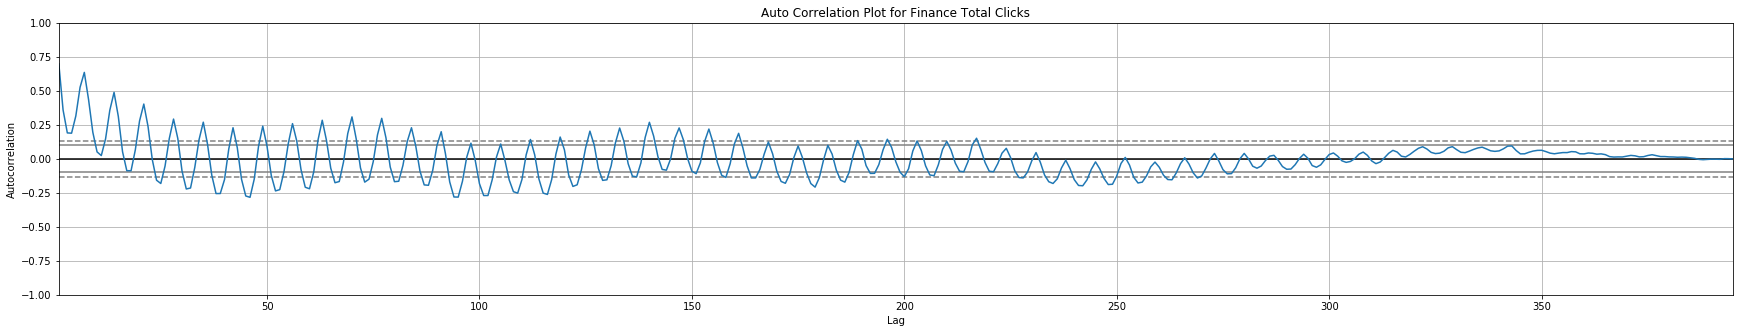

In [86]:
plt.figure(figsize=(30,5))
pd.plotting.autocorrelation_plot(total_clicks_ts_by_top4industry[['date','BANKS_AND_FINANCIAL_SERVICES']].set_index('date'))
plt.title('Auto Correlation Plot for Finance Total Clicks')

Text(0.5,1,'Auto Correlation Plot for Healthcare Total Clicks')

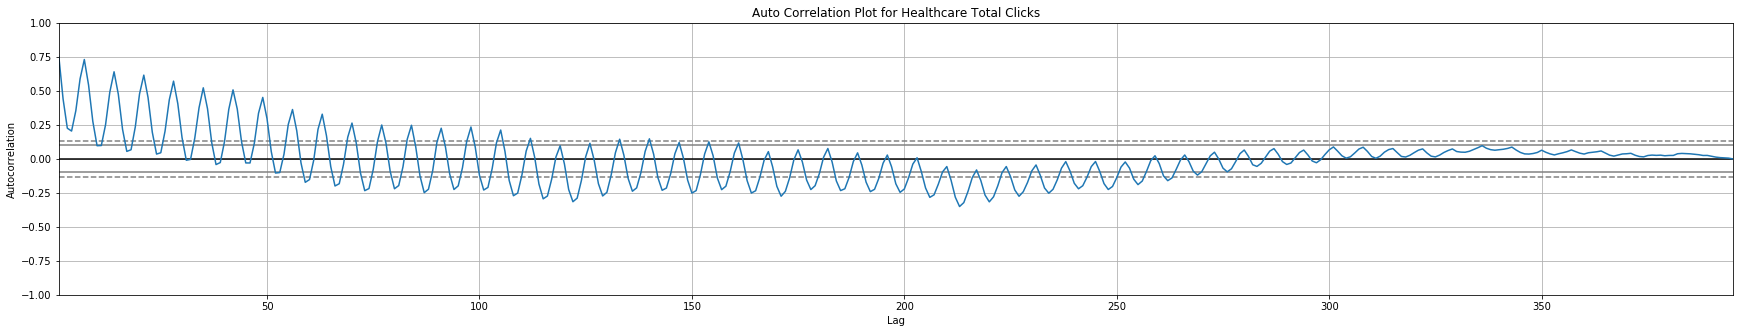

In [90]:
plt.figure(figsize=(30,5))
pd.plotting.autocorrelation_plot(total_clicks_ts_by_top4industry[['date','HEALTH_CARE']].set_index('date'))
plt.title('Auto Correlation Plot for Healthcare Total Clicks')

Text(0.5,1,'Auto Correlation Plot for IT&Software Total Clicks')

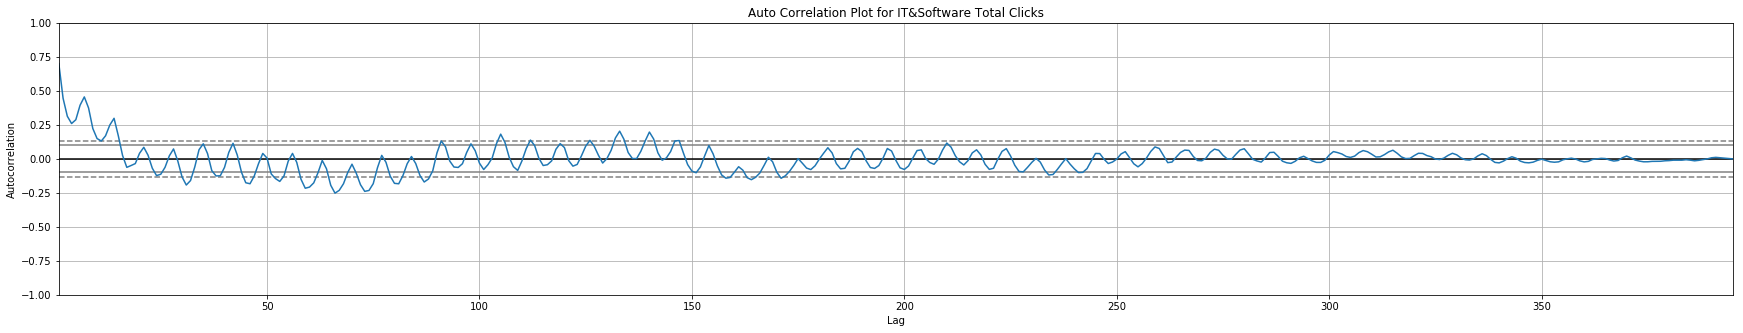

In [91]:
plt.figure(figsize=(30,5))
pd.plotting.autocorrelation_plot(total_clicks_ts_by_top4industry[['date','INTERNET_AND_SOFTWARE']].set_index('date'))
plt.title('Auto Correlation Plot for IT&Software Total Clicks')

Text(0.5,1,'Auto Correlation Plot for Consulting Total Clicks')

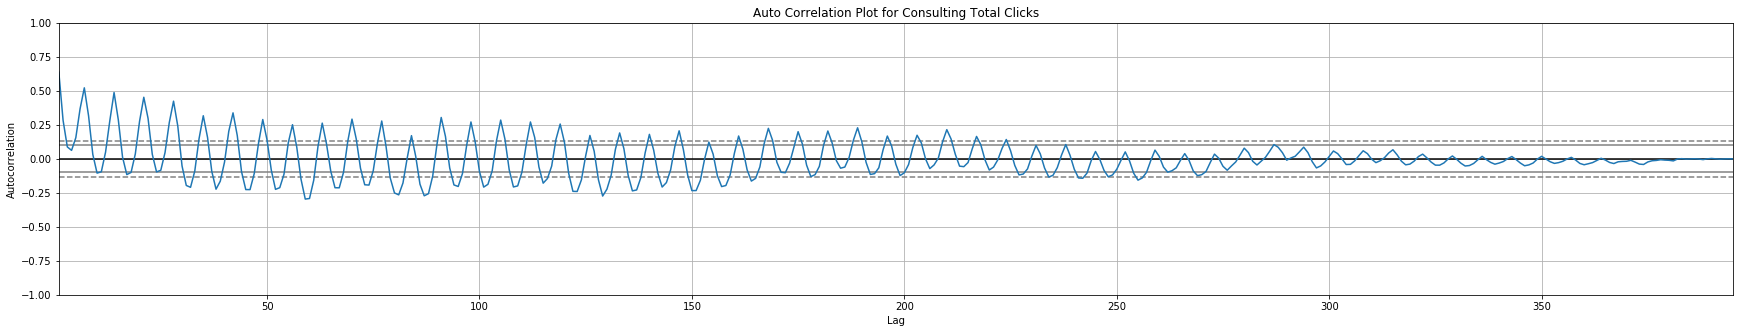

In [92]:
plt.figure(figsize=(30,5))
pd.plotting.autocorrelation_plot(total_clicks_ts_by_top4industry[['date','CONSULTING_AND_BUSINESS_SERVICES']].set_index('date'))
plt.title('Auto Correlation Plot for Consulting Total Clicks')

For all four industries, there are statistically significant positive autocorrelation up to about 50 lags(days), and this means when the number of total clicks rise, it tends to continue rising for 50 days. But IT&Sofware industry, in particular, only has positive autocorrelation up until 20 lags. Thus, it is advisable for **companies in these four popular industries to renew job postings every 50 days to maximize click numbers (job posting visibility) and this means it's better for these major industries to renew job postings more frequently than other industries because we found above taht the recommended renewal span for the total US clicks was 150 to 200 days.**